In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.describe()

,math score,reading score,writing score
count,1000.000000,995.000000,995.000000
mean,66.709000,69.127638,68.041206
std,21.167957,14.620924,15.206139
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.500000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,513.000000,100.000000,100.000000


## Task 1 - Scan all variables for missing values and inconsistencies

In [4]:
df.isnull().sum() # To check for the total no. of null values in columns

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  5
writing score                  5
dtype: int64

In [5]:
df.dtypes # Checking the data types of the various columns in the dataframe

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                  float64
writing score                  float64
dtype: object

## Task 2 - Scanning the numeric variables for outliers

<AxesSubplot:>

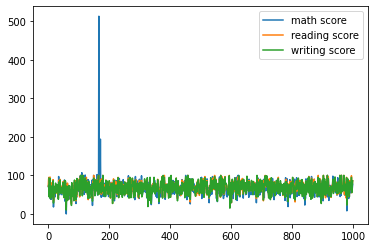

In [6]:
df.plot() # Plotting a generalised graph for the numerical columns

In [7]:
# From the above plot, we can clearly see that the math score has some anomality
# Hence, we will sort the values in the "math score" column
# By sorting the data, we can find the unusually high or low values.
df.sort_values("math score")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17.0,10.0
980,female,group B,high school,free/reduced,none,8,24.0,23.0
17,female,group B,some high school,free/reduced,none,18,32.0,28.0
787,female,group B,some college,standard,none,19,38.0,32.0
145,female,group C,some college,free/reduced,none,22,39.0,33.0
...,...,...,...,...,...,...,...,...
121,male,group B,associate's degree,standard,completed,101,89.0,92.0
160,male,group B,associate's degree,free/reduced,completed,102,78.0,74.0
110,female,group D,associate's degree,free/reduced,completed,107,89.0,98.0
171,male,group E,some high school,standard,none,194,88.0,78.0


<AxesSubplot:xlabel='math score'>

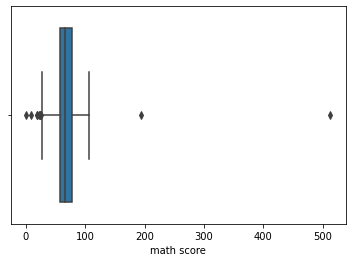

In [8]:
# As we  can clearly from the soretd data, there are some outliers in the "math score" columnns
# We will use boxplot to plot a graph of the "math score" columns
sns.boxplot(x = df["math score"])

## Task 2 - Using the Inter Quartile Range (IQR) method to deal with the outliers

In [9]:
# We shall use the Inter-Quartile Range (IQR) method to deal with the outliers
# First, we will define the quantiles which will then be used to declare the upper and lowe limits
Quantile1 = df["math score"].quantile(0.20) # Getting the 20th percentile value of the column
Quantile3 = df["math score"].quantile(0.75) # Getting the 75th percentile value of the column
Quantile1, Quantile3

(53.0, 77.0)

In [10]:
IQR = Quantile3 - Quantile1
IQR

24.0

In [11]:
# After finding hte quantiles, we will now decalre the upper and lower limits
lower_limit = Quantile1 - 1.5*IQR
upper_limit = Quantile3 + 1.5*IQR
lower_limit, upper_limit

(17.0, 113.0)

In [12]:
# After we have set the limits for our desired column, now we deal with the outliers
df[(df["math score"]<lower_limit)|(df["math score"]>upper_limit)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17.0,10.0
166,male,group C,high school,free/reduced,completed,513,51.0,51.0
171,male,group E,some high school,standard,none,194,88.0,78.0
980,female,group B,high school,free/reduced,none,8,24.0,23.0


In [13]:
# AS seen in the above table, we have detected 4 outliers in the "math score" column.
# We now have to just remove these outliers from our data.
df_new = df[(df["math score"]>lower_limit)&(df["math score"]<upper_limit)]
df_new
# We now have the data without the outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,NaN
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [14]:
# Comparing the mean values of the data, before and after our operations
print(df["math score"].mean()) 
print(df_new["math score"].mean())
# There was a difference of ~0.5 after our operations.
# This difference in the means is not that huge because of the lesser number of outliers present in the data

66.709
66.25903614457832


## Task 3 - Decrease the skewness and convert the distribution into a normal distribution

<AxesSubplot:xlabel='math score', ylabel='Density'>

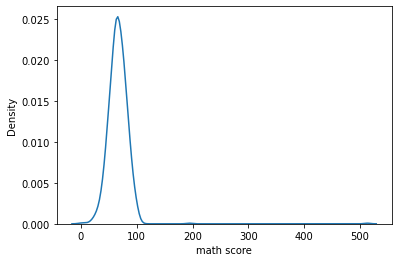

In [15]:
# Using the Kernel denstiy  estimate(KDE) plot to check the skewness of the distribution
sns.kdeplot(df["math score"])

<AxesSubplot:xlabel='math score', ylabel='Density'>

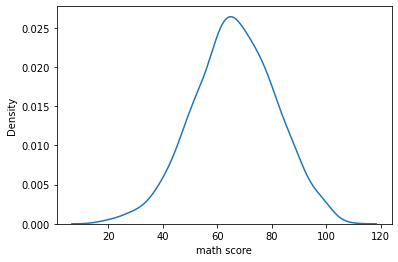

In [16]:
# As seen in the above KDE plot, the original "math score" data is skewed to the left
# We now check the distrubution after removing he outliers
sns.kdeplot(df_new["math score"])
# After removing he outliers, our "math score" distribution has become a normal distribution

## Task 1 - Replacing the NULL values with the mean value

In [17]:
# Scanning all the variables for missing values and inconsistencies
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  5
writing score                  5
dtype: int64

In [18]:
# Getting the mean vaues of the required columns
read_mean = df["reading score"].mean()
write_mean = df["writing score"].mean()
read_mean, write_mean

(69.12763819095477, 68.04120603015076)

In [19]:
# Replacing the NULL values with the mean value
df["reading score"].fillna(value=read_mean, inplace=True)
df["writing score"].fillna(value=write_mean, inplace=True)

In [20]:
# Verifying if the NULL values have been replaced
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64